In [1]:
import sys
import os
from tqdm import tqdm
import pandas as pd
import json

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

from visual_genome.local import VisualGenome

C:\Users\karab\AppData\Local\Temp\ipykernel_19132\1864603631.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
vg = VisualGenome()

In [27]:
# randomly sample an image
ims = vg.get_image_ids()

# randomly get an image
import random

im = (random.choice(ims))
graphviz(im)


In [88]:
im = vg.get_images_with_n_objects(n=30)
im = random.choice(im)
graphviz(im.id)

100%|██████████| 108077/108077 [00:00<00:00, 1489287.35it/s]


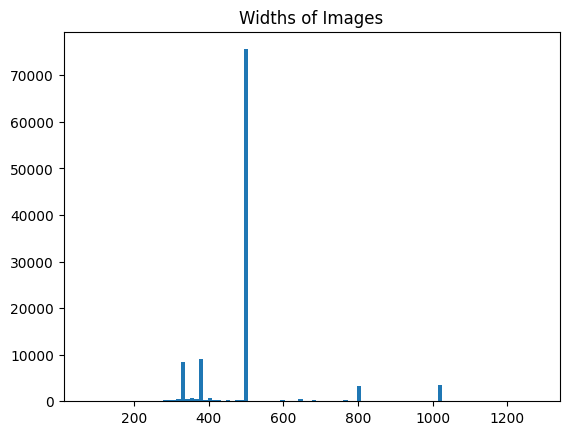

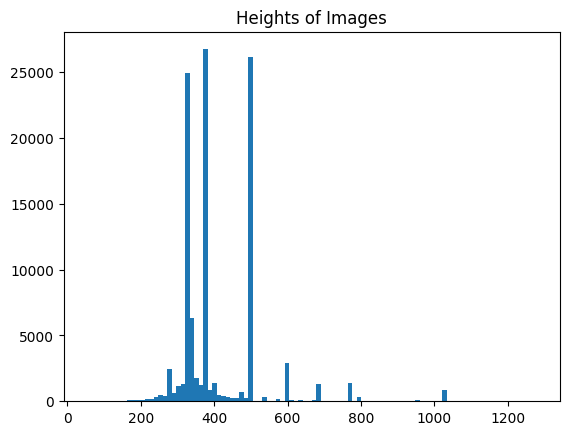

In [18]:
widths = []
heights = []

for im in tqdm(ims):
    data = vg.get_image(im)
    height = data.height
    width = data.width
    
    heights.append(height)
    widths.append(width)
    
# histogram
import matplotlib.pyplot as plt

plt.hist(widths, bins=100)
plt.title('Widths of Images')
plt.show()

plt.hist(heights, bins=100)
plt.title('Heights of Images')
plt.show()

In [9]:
ims = []

with open('candidate_sample.txt', 'r') as f:
    for line in f:
        ims.append(line.strip())

ims = [int(im) for im in ims]
print('Number of images:', len(ims))

Number of images: 1000


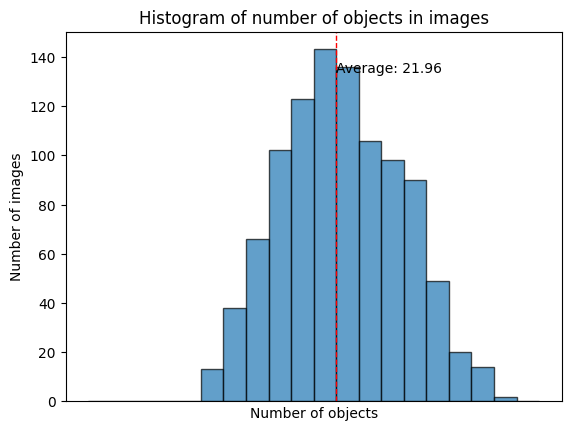

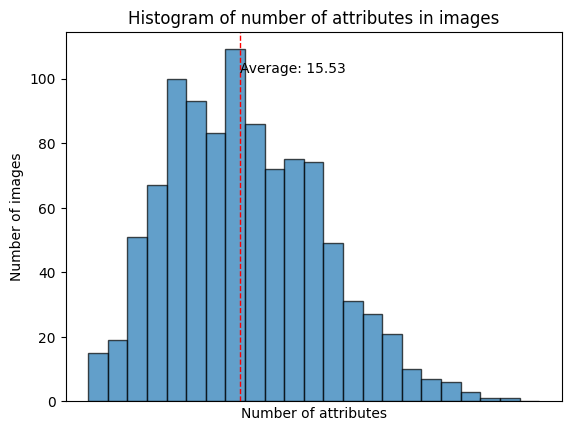

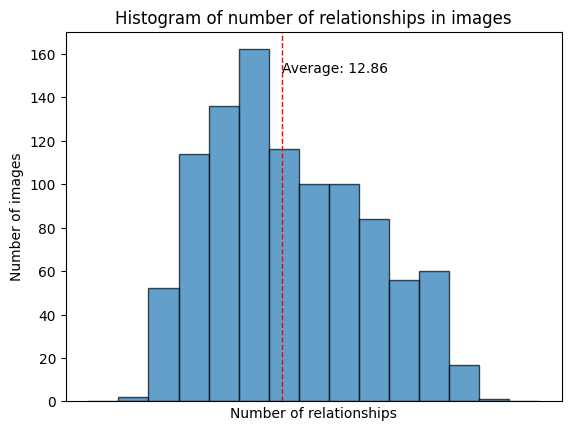

12.859

In [10]:
vg.histogram("objects", ims)
vg.histogram("attributes", ims)
vg.histogram("relationships", ims)

In [11]:
# RUN THIS BLOCK IF YOU HAVE SAM, SAM2 RESULTS IN THE DATA DIRECTORY - otherwise skip
vg.load_sam_results(version=1) # SAM
vg.load_sam_results(version=2) # SAM 2
vg.load_fc_clip_results() # FC-CLIP

{'2327998': [{'id': 1,
   'isthing': True,
   'category_id': 966,
   'area': 1021.0,
   'category': 'pennant'},
  {'id': 2,
   'isthing': True,
   'category_id': 0,
   'area': 568.0,
   'category': 'person,child,girl,boy,woman,man,people,children,girls,boys,women,men,lady,guy,ladies,guys,clothes'},
  {'id': 3,
   'isthing': True,
   'category_id': 0,
   'area': 662.0,
   'category': 'person,child,girl,boy,woman,man,people,children,girls,boys,women,men,lady,guy,ladies,guys,clothes'},
  {'id': 4,
   'isthing': True,
   'category_id': 0,
   'area': 712.0,
   'category': 'person,child,girl,boy,woman,man,people,children,girls,boys,women,men,lady,guy,ladies,guys,clothes'},
  {'id': 5,
   'isthing': True,
   'category_id': 0,
   'area': 2952.0,
   'category': 'person,child,girl,boy,woman,man,people,children,girls,boys,women,men,lady,guy,ladies,guys,clothes'},
  {'id': 6,
   'isthing': True,
   'category_id': 30,
   'area': 703.0,
   'category': 'skis'},
  {'id': 9,
   'isthing': True,
   'cat

In [3]:
def graphviz(image):
    scene_graph = vg.generate_scene_graph_json(image)

    # save to graph.json
    with open(f"../graphviz/scene_graph.json", "w") as f:
        json.dump(scene_graph, f)

In [45]:
# RANDOMLY VISUALIZE A SCENE GRAPH
import random

image = random.choice(ims)
graphviz(image) 

# python graphviz/visualize_scene_graph.py

In [46]:
############# Correlation between other features #############

# get features.csv
df_feat = pd.read_csv('features.csv')

# get correlation of all features on a heatmap
# create a heatmap of correlations between all features
df_feat["avg_object_similarity"] *= -1
df_feat["avg_region_similarity"] *= -1
df_feat["avg_rel_similarity"] *= -1

def print_cors(df_feat):
    print("Correlation between:")
    print("Predicted complexity and # of SAM 2 segmentations: ", df_feat['predicted_complexity'].corr(df_feat['# of SAM 2 segmentations'], method='spearman'))
    print("Predicted complexity and # of SAM segmentations: ", df_feat['predicted_complexity'].corr(df_feat['# of SAM segmentations'], method='spearman'))
    print("Predicted complexity and # of FC-CLIP segmentations: ", df_feat['predicted_complexity'].corr(df_feat['# of FC-CLIP classes'], method='spearman'))
    print("Predicted complexity and average object dissimilarity: ", df_feat['predicted_complexity'].corr(df_feat['avg_object_similarity'], method='spearman'))
    print("Predicted complexity and average region dissimilarity: ", df_feat['predicted_complexity'].corr(df_feat['avg_region_similarity'], method='spearman'))
    print("Predicted complexity and average relationship dissimilarity: ", df_feat['predicted_complexity'].corr(df_feat['avg_rel_similarity'], method='spearman'))

In [20]:
# get only the images in suitables
df_new = df_feat[df_feat['image_id'].isin(ims)]
print_cors(df_new)

Correlation between:
Predicted complexity and # of SAM 2 segmentations:  0.5867307820112289
Predicted complexity and # of SAM segmentations:  0.7921737636623687
Predicted complexity and # of FC-CLIP segmentations:  0.5343163526387182
Predicted complexity and average object dissimilarity:  0.12334015446377321
Predicted complexity and average region dissimilarity:  0.2959460782056487
Predicted complexity and average relationship dissimilarity:  0.24180110147211675


In [57]:
# HERE YOU CAN VISUALIZE THE IMAGES IN THE SUBSAMPLE BELONGING TO A SPECIFIC CLUSTER 

df_cluster = pd.read_csv('categories_all-mpnet-base-v2_80clusters_simple.csv')

# get images in a cluster
def get_images_in_cluster(cluster_id, df_cluster, ims):
    images = []
    for i in range(len(df_cluster)):
        if df_cluster['cluster'][i] == cluster_id:
            if df_cluster['Image_id'][i] in ims:
                images.append(df_cluster['Image_id'][i])
    return images

cluster_images_from_sample = get_images_in_cluster(6, df_cluster, ims)
len(cluster_images_from_sample)

(15,
 [4931,
  2403360,
  2399556,
  2398923,
  2395177,
  2395017,
  2382221,
  2375403,
  2371031,
  2367513,
  2360891,
  2352575,
  2328618,
  2326165,
  2320938])

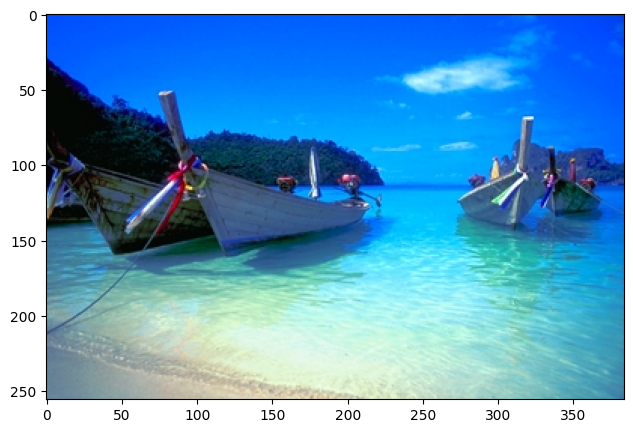

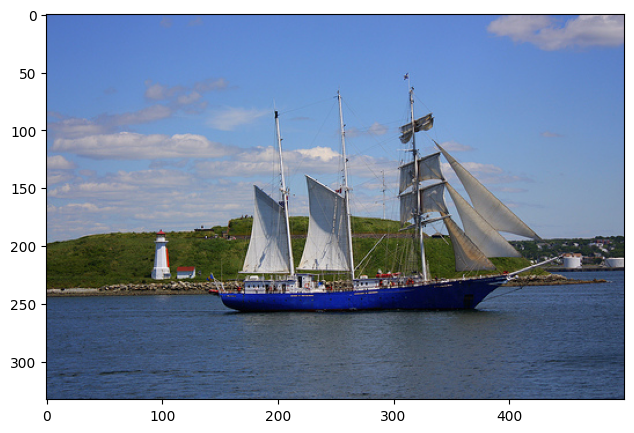

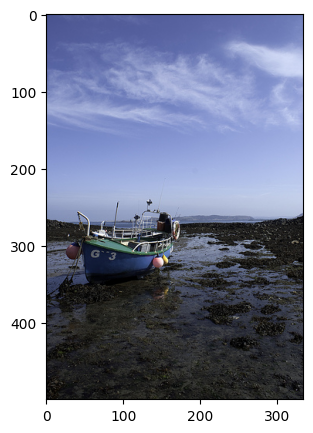

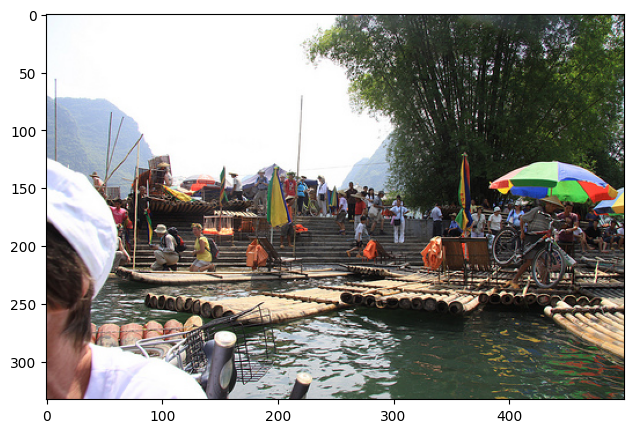

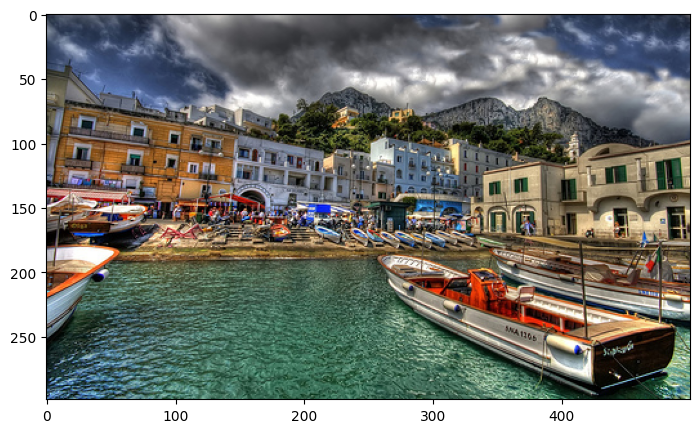

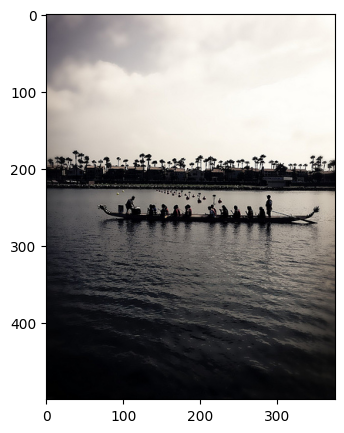

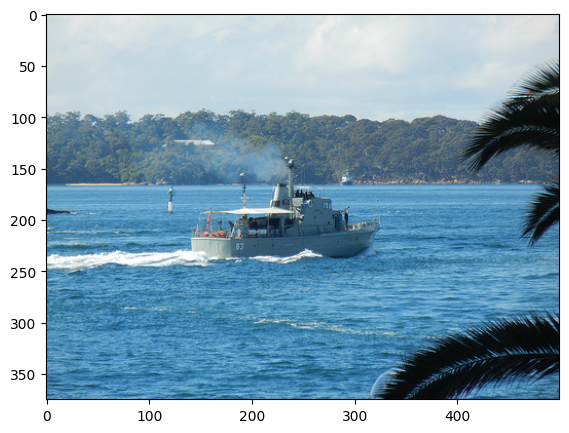

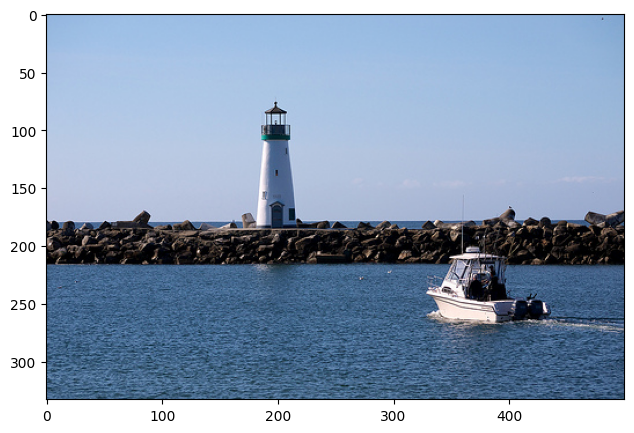

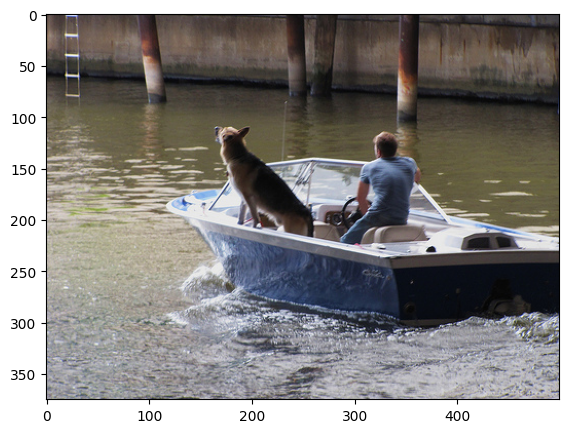

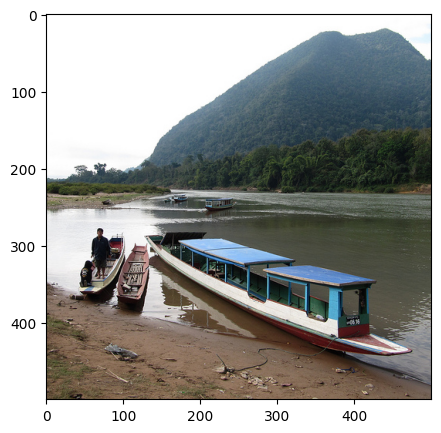

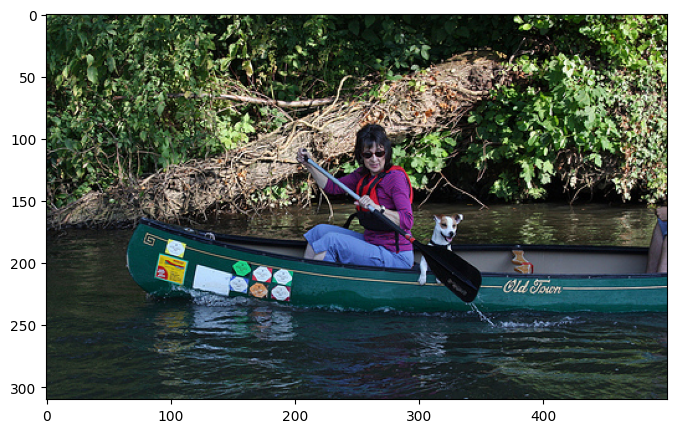

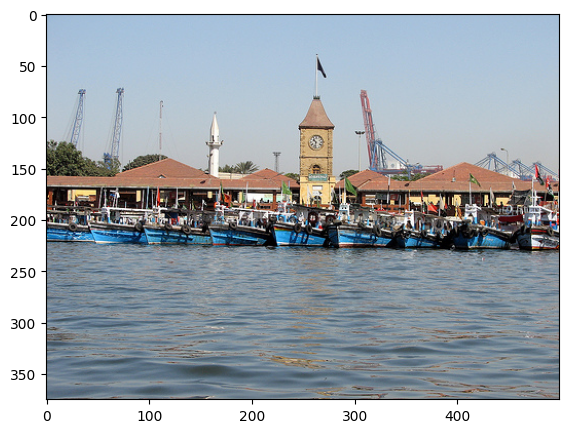

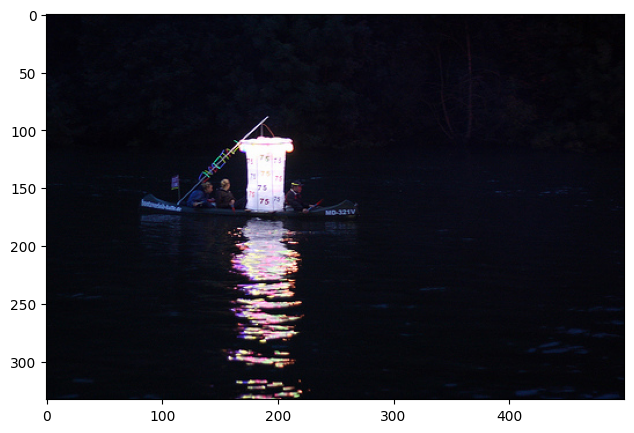

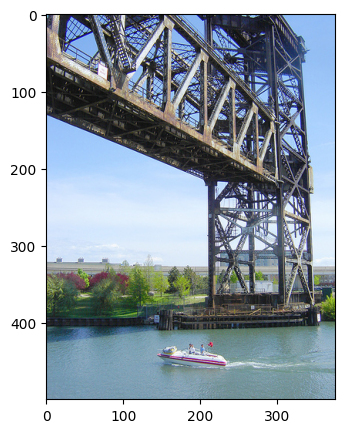

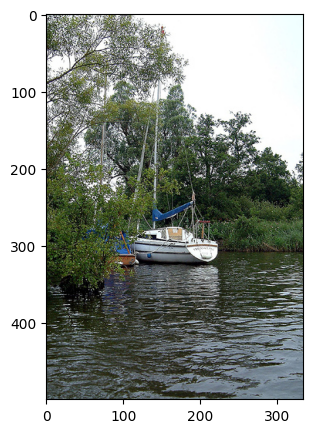

In [56]:
for image in cluster_images_from_sample:
    vg.visualize_objects(image, 0)

In [59]:
# You can visualize them on the browser as well

print(cluster_images_from_sample)
graphviz(cluster_images_from_sample[0])

[4931, 2403360, 2399556, 2398923, 2395177, 2395017, 2382221, 2375403, 2371031, 2367513, 2360891, 2352575, 2328618, 2326165, 2320938]
